In [21]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import joblib
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

#time
from datetime import datetime
import time

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import dataset

In [23]:
dataset = pandas.read_csv('/content/drive/MyDrive/Project/Project Final/Dataset/Combine_60sec_Changelabel.csv')

In [24]:
print (dataset.shape)

(1009241, 27)


Head

In [25]:
print(dataset.head(20))

        ip.src      ip.dst  ip.len  ip.flags.df  ip.flags.mf  ip.fragment  \
0   3232235786  3232236810      60            1            0            0   
1   3232236810  3232235786      60            1            0            0   
2   3232235786  3232236810      52            1            0            0   
3   3232235786  3232236810     128            1            0            0   
4   3232236810  3232235786      52            1            0            0   
5   3232236810  3232235786    1119            1            0            0   
6   3232235786  3232236810      52            1            0            0   
7   3232235786  3232236810      52            1            0            0   
8   3232236810  3232235786      52            1            0            0   
9   3232235786  3232236810      52            1            0            0   
10  3232235786  3232236810      60            1            0            0   
11  3232236810  3232235786      60            1            0            0   

Descriptions

In [26]:
print(dataset.describe())

             ip.src        ip.dst        ip.len   ip.flags.df   ip.flags.mf  \
count  1.009241e+06  1.009241e+06  1.009241e+06  1.009241e+06  1.009241e+06   
mean   3.232188e+09  3.232198e+09  7.655848e+02  5.180130e-03  4.973500e-01   
std    1.246087e+07  1.285868e+07  7.308525e+02  7.178650e-02  4.999932e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.232236e+09  3.232237e+09  3.800000e+01  0.000000e+00  0.000000e+00   
50%    3.232236e+09  3.232237e+09  5.200000e+01  0.000000e+00  0.000000e+00   
75%    3.232236e+09  3.232237e+09  1.500000e+03  0.000000e+00  1.000000e+00   
max    3.232237e+09  4.294967e+09  1.500000e+03  1.000000e+00  1.000000e+00   

        ip.fragment  ip.fragment.count  ip.fragments        ip.ttl  \
count  1.009241e+06       1.009241e+06     1009241.0  1.009241e+06   
mean   2.496513e+05       9.947000e-01           0.0  6.399198e+01   
std    3.236698e+05       9.999865e-01           0.0  5.460948e-01   
min    0

Plot correlation

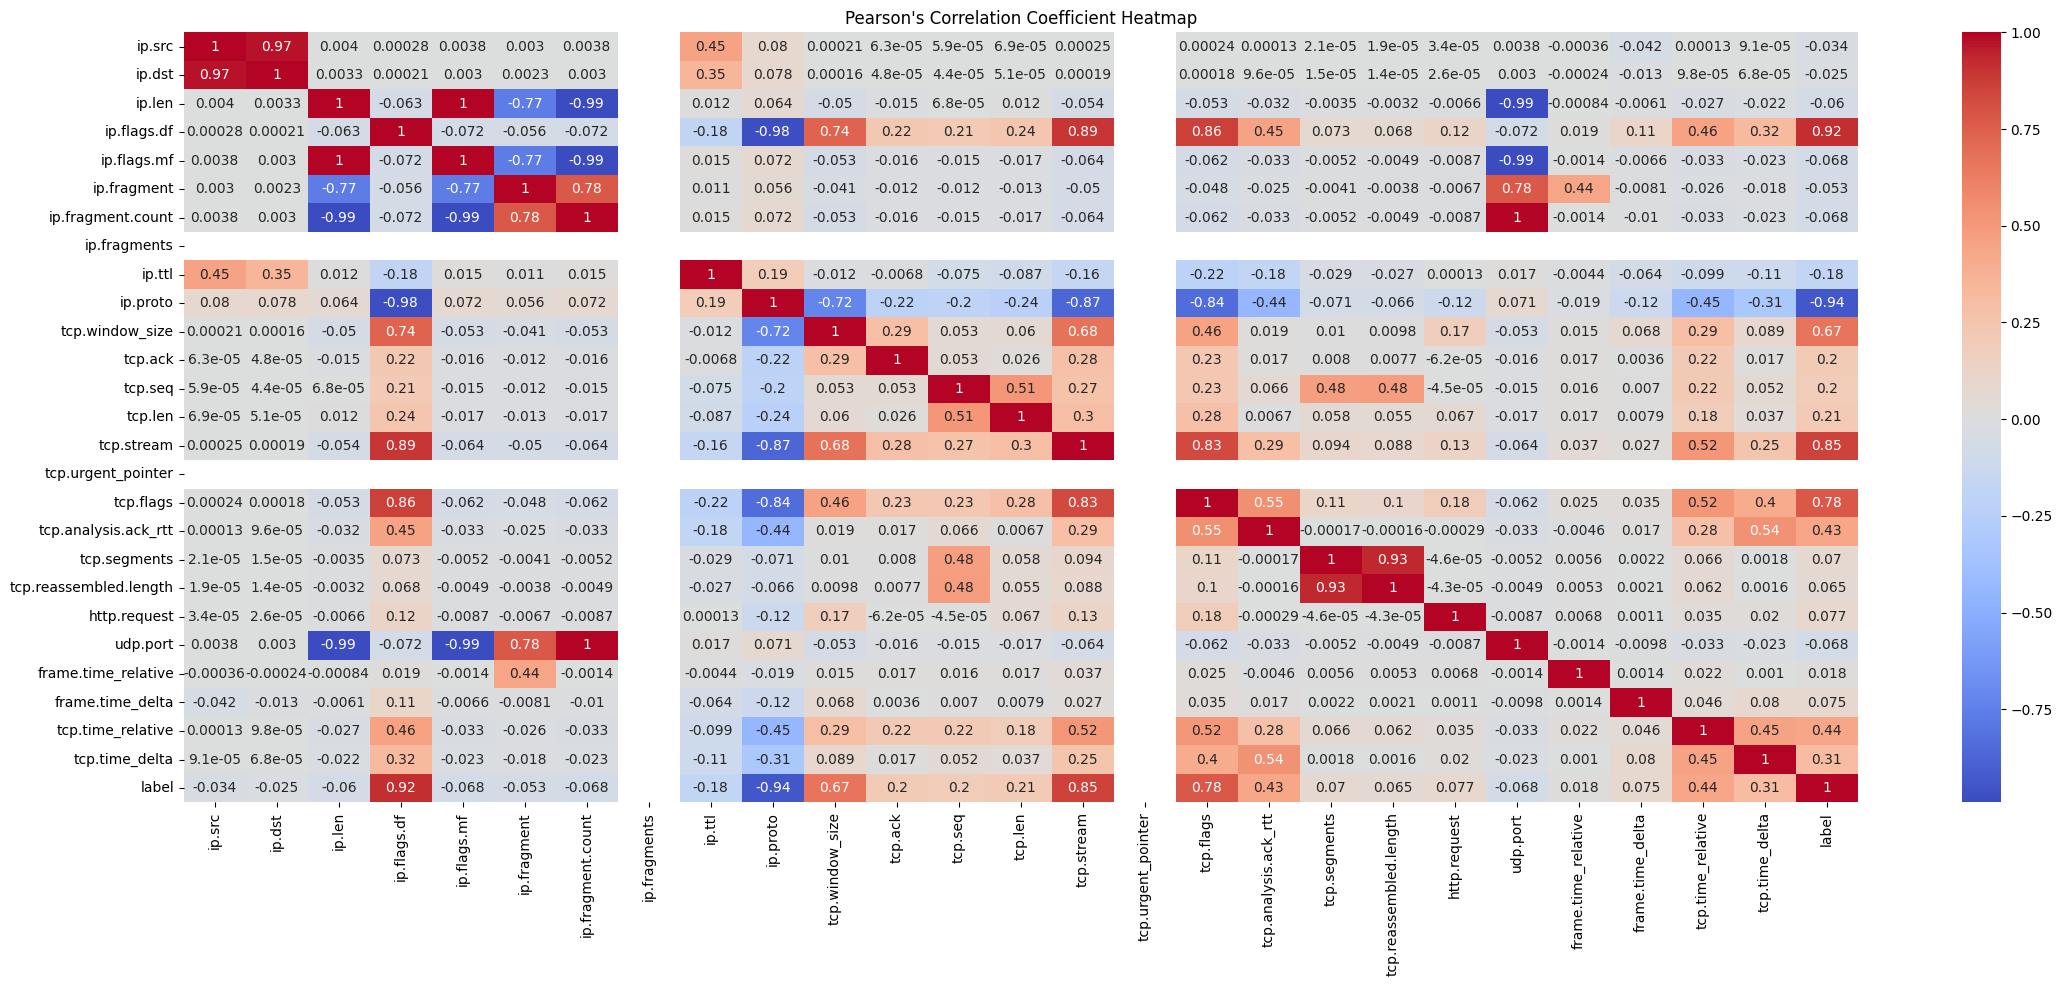

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Compute the correlation matrix
corr_matrix = dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(27, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title("Pearson's Correlation Coefficient Heatmap")
#plt.xticks(rotation=45)
#plt.yticks(rotation=0)
plt.show()

Cut in feature

In [28]:
dataset.columns

Index(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags', 'tcp.analysis.ack_rtt',
       'tcp.segments', 'tcp.reassembled.length', 'http.request', 'udp.port',
       'frame.time_relative', 'frame.time_delta', 'tcp.time_relative',
       'tcp.time_delta', 'label'],
      dtype='object')

In [29]:
cols = [#'ip.src', 'ip.dst', 'ip.len', 
        'ip.flags.df', 
        #'ip.flags.mf','ip.fragment','ip.fragment.count', 'ip.fragments',
        'ip.ttl',
        'ip.proto', 'tcp.window_size',
        #'tcp.ack', 'tcp.seq', 'tcp.len', 
        'tcp.stream',#'tcp.urgent_pointer',
         'tcp.flags', 'tcp.analysis.ack_rtt',
        #'tcp.segments', 'tcp.reassembled.length', 'http.request', 
        #'udp.port','frame.time_relative', 'frame.time_delta',
        'tcp.time_relative', 'tcp.time_delta', 'label']
A = dataset[cols]

In [30]:
correlation_matrix = A.corr()

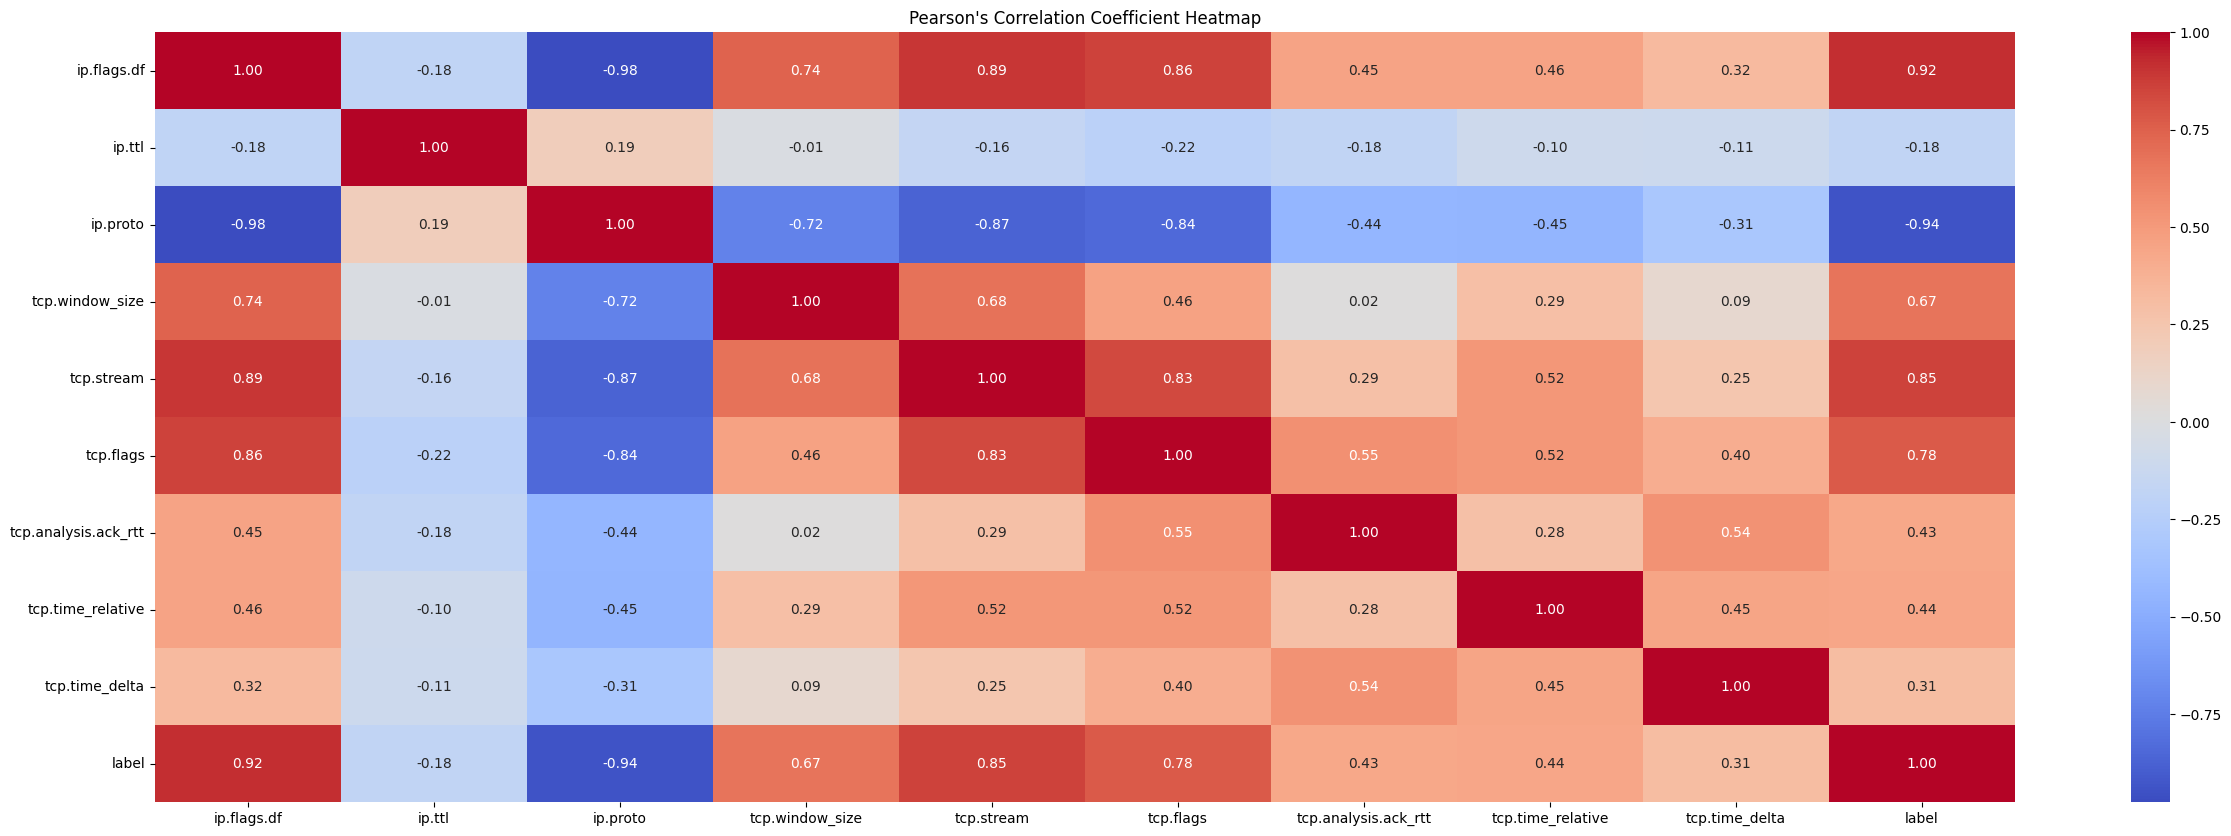

In [31]:
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Coefficient Heatmap")
plt.show()

class distribution

In [32]:
print(A.groupby('label').size())

label
1        132
2    1003932
3       5049
4        128
dtype: int64


split dataset

In [33]:
# split dataset
array = A.values
print (array)
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.30
seed = 42

[[1.0000e+00 6.4000e+01 6.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0000e+00 6.1000e+01 6.0000e+00 ... 1.7201e-02 1.7201e-02 1.0000e+00]
 [1.0000e+00 6.4000e+01 6.0000e+00 ... 1.7231e-02 3.0000e-05 1.0000e+00]
 ...
 [1.0000e+00 6.4000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 4.0000e+00]
 [0.0000e+00 6.1000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 4.0000e+00]
 [0.0000e+00 2.0000e+00 1.7000e+01 ... 0.0000e+00 0.0000e+00 4.0000e+00]]


In [34]:
print (X)
print (Y)

[[1.0000e+00 6.4000e+01 6.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 6.1000e+01 6.0000e+00 ... 1.7201e-02 1.7201e-02 1.7201e-02]
 [1.0000e+00 6.4000e+01 6.0000e+00 ... 3.0000e-05 1.7231e-02 3.0000e-05]
 ...
 [1.0000e+00 6.4000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 6.1000e+01 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.0000e+00 1.7000e+01 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
[1. 1. 1. ... 4. 4. 4.]


Split dataset into training set and test set

เปลี่ยนตัวแปร

In [35]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train_set, X_validation, Y_train_set, Y_validation = model_selection.train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

In [36]:
# Test options and evaluation metric
scoring = 'accuracy'

In [37]:
# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier()))

In [67]:
# evaluate each model in turn
results = []
names = []
times = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append(cv_results)
        names.append(name)
        times.append(execution_time)
        msg = "%s Accuracy: %f (+/- %f),  Processing time: %.2f seconds" % (name, cv_results.mean(), cv_results.std(), execution_time)
        print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR Accuracy: 0.999806 (+/- 0.000053),  Processing time: 76.83 seconds
CART Accuracy: 0.999929 (+/- 0.000013),  Processing time: 0.67 seconds
NB Accuracy: 0.999875 (+/- 0.000021),  Processing time: 1.02 seconds
ANN Accuracy: 0.999578 (+/- 0.000402),  Processing time: 277.06 seconds


# LR Classification report

In [39]:
# Make predictions on validation dataset
print("\n LR results on 30% validation set \n")


 LR results on 30% validation set 



In [40]:
# Create Decision Tree classifer object
lr = LogisticRegression()

In [41]:
# Train Decision Tree Classifer
lr.fit(X_train_set, Y_train_set)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
#saving the model using joblib 
filename = 'finalized_LR_model.sav'
joblib.dump(lr, filename)

['finalized_LR_model.sav']

In [43]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9998961975266701


In [44]:
#Predict the response for validation dataset
predictions_rfc = lr.predict(X_validation)
print("\nLR accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


LR accuracy validation: 

0.9998961975266701
[[    23      0      5      0]
 [     0 210853      0      7]
 [     5      2   1014      3]
 [     0      0      0     29]]
              precision    recall  f1-score   support

      Benign   0.821429  0.821429  0.821429        28
         Dos   0.999991  0.999967  0.999979    210860
       Probe   0.995093  0.990234  0.992658      1024
      Normal   0.743590  1.000000  0.852941        29

    accuracy                       0.999896    211941
   macro avg   0.890026  0.952907  0.916752    211941
weighted avg   0.999908  0.999896  0.999900    211941



In [45]:
# Make predictions on test dataset
print("\nLR results on final 30% test \n")
newlr = LogisticRegression()
newlr.fit(X_train_set, Y_train_set)
newpredictions_rfc = newlr.predict(X_test)
print("\nLR accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


LR results on final 30% test 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LR accuracy test: 

0.9998744934323734
[[    29      1      7      1]
 [     0 301181      0     11]
 [     7      6   1490      3]
 [     0      2      0     35]]
              precision    recall  f1-score   support

      Benign   0.805556  0.763158  0.783784        38
         Dos   0.999970  0.999963  0.999967    301192
       Probe   0.995324  0.989376  0.992341      1506
      Normal   0.700000  0.945946  0.804598        37

    accuracy                       0.999874    302773
   macro avg   0.875212  0.924611  0.895172    302773
weighted avg   0.999886  0.999874  0.999878    302773



# Cart test classification report


Make predictions on validation dataset

In [46]:
# Make predictions on validation dataset
print("\n CART results on 30% validation set \n")


 CART results on 30% validation set 



In [47]:
# Create Decision Tree classifer object
cart = DecisionTreeClassifier()

In [48]:
# Train Decision Tree Classifer
cart.fit(X_train_set, Y_train_set)

DecisionTreeClassifier()

In [49]:
#saving the model using joblib 
filename = 'finalized_CART_model.sav'
joblib.dump(cart, filename)

['finalized_CART_model.sav']

In [50]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9999339438806083


In [51]:
#Predict the response for test dataset
predictions_rfc = cart.predict(X_validation)
print("\nCART accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


CART accuracy validation: 

0.9999339438806083
[[    24      0      4      0]
 [     0 210855      0      5]
 [     3      1   1020      0]
 [     0      1      0     28]]
              precision    recall  f1-score   support

      Benign   0.888889  0.857143  0.872727        28
         Dos   0.999991  0.999976  0.999983    210860
       Probe   0.996094  0.996094  0.996094      1024
      Normal   0.848485  0.965517  0.903226        29

    accuracy                       0.999934    211941
   macro avg   0.933365  0.954683  0.943008    211941
weighted avg   0.999936  0.999934  0.999935    211941



In [52]:
# Make predictions on test dataset
print("\nCART results on final 30% test \n")
newcart = DecisionTreeClassifier()
newcart.fit(X_train_set, Y_train_set)
newpredictions_rfc = newcart.predict(X_test)
print("\nCART accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


CART results on final 30% test 


CART accuracy test: 

0.9999042186720745
[[    30      2      6      0]
 [     0 301185      0      7]
 [     8      0   1496      2]
 [     0      4      0     33]]
              precision    recall  f1-score   support

      Benign   0.789474  0.789474  0.789474        38
         Dos   0.999980  0.999977  0.999978    301192
       Probe   0.996005  0.993360  0.994681      1506
      Normal   0.785714  0.891892  0.835443        37

    accuracy                       0.999904    302773
   macro avg   0.892793  0.918676  0.904894    302773
weighted avg   0.999908  0.999904  0.999906    302773



# NB Classification report

In [53]:
# Make predictions on validation dataset
print("\n NB results on 30% validation set \n")


 NB results on 30% validation set 



In [54]:
# Create Decision Tree classifer object
nb = GaussianNB()

In [55]:
# Train Decision Tree Classifer
nb.fit(X_train_set, Y_train_set)

GaussianNB()

In [56]:
#saving the model using joblib 
filename = 'finalized_NB_model.sav'
joblib.dump(nb, filename)

['finalized_NB_model.sav']

In [57]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9998867609381856


In [58]:
#Predict the response for validation dataset
predictions_rfc = nb.predict(X_validation)
print("\nNB accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


NB accuracy validation: 

0.9998867609381856
[[    28      0      0      0]
 [     0 210852      0      8]
 [    13      0   1008      3]
 [     0      0      0     29]]
              precision    recall  f1-score   support

      Benign   0.682927  1.000000  0.811594        28
         Dos   1.000000  0.999962  0.999981    210860
       Probe   1.000000  0.984375  0.992126      1024
      Normal   0.725000  1.000000  0.840580        29

    accuracy                       0.999887    211941
   macro avg   0.851982  0.996084  0.911070    211941
weighted avg   0.999920  0.999887  0.999896    211941



In [59]:
# Make predictions on test dataset
print("\nNB results on final 30% test \n")
newnb = GaussianNB()
newnb.fit(X_train_set, Y_train_set)
newpredictions_rfc = newnb.predict(X_test)
print("\nNB accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


NB results on final 30% test 


NB accuracy test: 

0.9998579794103173
[[    36      0      0      2]
 [     0 301181      0     11]
 [    24      3   1476      3]
 [     0      0      0     37]]
              precision    recall  f1-score   support

      Benign   0.600000  0.947368  0.734694        38
         Dos   0.999990  0.999963  0.999977    301192
       Probe   1.000000  0.980080  0.989940      1506
      Normal   0.698113  1.000000  0.822222        37

    accuracy                       0.999858    302773
   macro avg   0.824526  0.981853  0.886708    302773
weighted avg   0.999903  0.999858  0.999872    302773



# ANN Classification report

In [60]:
# Make predictions on validation dataset
print("\n ANN results on 30% validation set \n")


 ANN results on 30% validation set 



In [61]:
# Create Decision Tree classifer object
ann = MLPClassifier()

In [62]:
# Train Decision Tree Classifer
ann.fit(X_train_set, Y_train_set)

MLPClassifier()

In [63]:
#saving the model using joblib 
filename = 'finalized_ANN_model.sav'
joblib.dump(ann, filename)

['finalized_ANN_model.sav']

In [64]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9997263389339486


In [65]:
#Predict the response for validation dataset
predictions_rfc = ann.predict(X_validation)
print("\nANN accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


ANN accuracy validation: 

0.9997263389339486
[[    28      0      0      0]
 [     0 210857      1      2]
 [    39      0    984      1]
 [     0     15      0     14]]
              precision    recall  f1-score   support

      Benign   0.417910  1.000000  0.589474        28
         Dos   0.999929  0.999986  0.999957    210860
       Probe   0.998985  0.960938  0.979592      1024
      Normal   0.823529  0.482759  0.608696        29

    accuracy                       0.999726    211941
   macro avg   0.810088  0.860920  0.794430    211941
weighted avg   0.999823  0.999726  0.999751    211941



In [66]:
# Make predictions on test dataset
print("\nANN results on final 30% test \n")
newann = MLPClassifier()
newann.fit(X_train_set, Y_train_set)
newpredictions_rfc = newann.predict(X_test)
print("\nANN accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


ANN results on final 30% test 


ANN accuracy test: 

0.9997324728426907
[[    36      0      1      1]
 [     0 301181      0     11]
 [    64      0   1440      2]
 [     0      0      2     35]]
              precision    recall  f1-score   support

      Benign   0.360000  0.947368  0.521739        38
         Dos   1.000000  0.999963  0.999982    301192
       Probe   0.997921  0.956175  0.976602      1506
      Normal   0.714286  0.945946  0.813953        37

    accuracy                       0.999732    302773
   macro avg   0.768052  0.962363  0.828069    302773
weighted avg   0.999874  0.999732  0.999783    302773

